In [1]:
#all
#orange
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'  #No logging TF

import tensorflow as tf
import numpy as np
import time
from Generator import OmniglotGenerator
from numpy import *;
import random

other_class=0
nb_class =10+other_class
input_size = 784
img_size=(28,28)
batch_size_om = 16
nb_samples_per_class = 17
train_samples_per_class=1

train_samples=17
mb_size = 64

generator1 = OmniglotGenerator(data_folder='/home/pt/test1/data/omtrain', \
                               batch_size=batch_size_om, nb_samples=nb_class,\
                               nb_samples_per_class=nb_samples_per_class,\
                               max_rotation=0., max_shift=0.,img_size=img_size, max_iter=None,\
                               train_samples_per_class=train_samples_per_class)
x_test,y_test=generator1.sample(nb_class)

example_outputs = y_test.reshape(batch_size_om*nb_class*nb_samples_per_class,1)
example_input=x_test.reshape(batch_size_om*nb_class*nb_samples_per_class,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

train_input=np.zeros((batch_size_om *train_samples*(nb_class-other_class),input_size))
train_outputs=np.zeros((batch_size_om *train_samples*(nb_class-other_class),nb_class))
jte=0
jtr=0
jto=0
for k in range (nb_class):
    for i in range (batch_size_om *nb_samples_per_class*nb_class):
        if example_outputs[i]==k:
            train_input[jtr]=example_input[i]
            train_outputs[jtr][k]=1
            jtr+=1
            
                

    
    
def getbatchtrain(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
    return batchtrain,labeltrain

def getbatchtrain2(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    batchtrain2=np.zeros((size,input_size))
    labeltrain2=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        jjj=idx_1/(batch_size_om*train_samples)
        idx_2 = random.randint(int(jjj)*(batch_size_om*train_samples),int(jjj+1)*(batch_size_om*train_samples)-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
        batchtrain2[i,:] = train_input[idx_2,:]
        labeltrain2[i,:]=train_outputs[idx_2,:]
    return batchtrain,labeltrain,batchtrain2,labeltrain2


other_classt=0
nb_classt =10+other_classt
input_sizet = 784
img_sizet=(28,28)
batch_size_omt = 16
nb_samples_per_classt = 3
train_samples_per_classt=1

train_samplest=3
mb_sizet = 64

generator1t = OmniglotGenerator(data_folder='/home/pt/test1/data/omtest', \
                               batch_size=batch_size_omt, nb_samples=nb_classt,\
                               nb_samples_per_class=nb_samples_per_classt,\
                               max_rotation=0., max_shift=0.,img_size=img_sizet, max_iter=None,\
                               train_samples_per_class=train_samples_per_classt)
x_testt,y_testt=generator1t.sample(nb_classt)

example_outputst = y_testt.reshape(batch_size_omt*nb_classt*nb_samples_per_classt,1)
example_inputt=x_testt.reshape(batch_size_omt*nb_classt*nb_samples_per_classt,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

test_input=np.zeros((batch_size_omt *train_samplest*(nb_classt-other_classt),input_sizet))
test_outputs=np.zeros((batch_size_omt *train_samplest*(nb_classt-other_classt),nb_classt))
jte=0
jtr=0
jto=0
for k in range (nb_classt):
    for i in range (batch_size_omt *nb_samples_per_classt*nb_classt):
        if example_outputst[i]==k:
            test_input[jtr]=example_inputt[i]
            test_outputs[jtr][k]=1
            jtr+=1           
    
def getbatchtest(size):
    batchtest=np.zeros((size,input_sizet))
    labeltest=np.zeros((size,nb_classt))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_omt *(nb_classt-other_classt)*train_samplest-1)
        batchtest[i,:] = test_input[idx_1,:]
        labeltest[i,:]=test_outputs[idx_1,:]
    return batchtest,labeltest

def getbatchtest2(size):
    batchtest=np.zeros((size,input_sizet))
    labeltest=np.zeros((size,nb_classt))
    batchtest2=np.zeros((size,input_sizet))
    labeltest2=np.zeros((size,nb_classt))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_omt *(nb_classt-other_classt)*train_samplest-1)
        jjj=idx_1/(batch_size_omt*train_samplest)
        idx_2 = random.randint(int(jjj)*(batch_size_omt*train_samplest),int(jjj+1)*(batch_size_omt*train_samplest)-1)
        batchtest[i,:] = test_input[idx_1,:]
        labeltest[i,:]=test_outputs[idx_1,:]
        batchtest2[i,:] = test_input[idx_2,:]
        labeltest2[i,:]=test_outputs[idx_2,:]
    return batchtest,labeltest,batchtest2,labeltest2

z,_=getbatchtrain(10)
z,_=getbatchtest(10)

#z,_=getbatchone(10)
z.shape



(10, 784)

In [2]:
#28-om2
from __future__ import division, print_function, absolute_import
import random
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/data/mnist", one_hot=True)
# Parameters
# Parameters
from PIL import Image
import tensorflow as tf

#from utils.data_utils import img_to_array, array_to_img
from transformer import spatial_transformer_network as stn

learning_rate = 0.001
num_steps2 = 160000*4
batch_size = 64

# Network Parameters
image_dim = 784 # MNIST images are 28x28 pixels
image_dimd=int(784/28)
hidden_dim = 512
hidden_dimt1=512
hidden_dimt2=256
hidden_dimt3=128
hidden_dimt4=30

y_dim2=784

hidden_dim2 = 2


latent_dim =2
y_dim22=10

index=int(784/28)

def sample_c(m, n, ind=-1):
    c = np.zeros([m,n])
    for i in range(m):
        if ind<0:
            ind = np.random.randint(n)
        c[i,ind] = 1
    return c

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

# Variables
weightst = {
    'encoder_h11': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h21': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h31': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h41': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h51': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h61': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h71': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h81': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
     'encoder_h91': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h101': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h111': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h121': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h131': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h141': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h151': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h161': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
     'encoder_h171': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h181': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h191': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h201': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h211': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h221': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h231': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h241': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h251': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h261': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h271': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h281': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
    
    'encoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dimt1])),
    'encoder_h02': tf.Variable(glorot_init([hidden_dimt1, hidden_dimt2])),
    'encoder_h03': tf.Variable(glorot_init([hidden_dimt2, hidden_dimt3])),
    'encoder_h04': tf.Variable(glorot_init([hidden_dimt3, hidden_dimt4])),
    
    'encoder_h1': tf.Variable(glorot_init([hidden_dim2*28+hidden_dimt4+y_dim22, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim+hidden_dimt4+y_dim22, hidden_dim])),
    
     'decoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dimt1])),
    'decoder_h02': tf.Variable(glorot_init([hidden_dimt1, hidden_dimt2])),
    'decoder_h03': tf.Variable(glorot_init([hidden_dimt2, hidden_dimt3])),
    'decoder_h04': tf.Variable(glorot_init([hidden_dimt3, hidden_dimt4])),

    

   'decoder_out01': tf.Variable(glorot_init([hidden_dim, hidden_dimt2])),
    'decoder_out02': tf.Variable(glorot_init([hidden_dimt2, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, image_dim])),
    


}
biasest = {
    'encoder_b11': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b21': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b31': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b41': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b51': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b61': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b71': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b81': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b91': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b101': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b111': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b121': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b131': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b141': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b151': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b161': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b171': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b181': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b191': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b201': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b211': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b221': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b231': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b241': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b251': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b261': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b271': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b281': tf.Variable(glorot_init([hidden_dim2])),

    
'encoder_b01': tf.Variable(glorot_init([hidden_dimt1])),
    'encoder_b02': tf.Variable(glorot_init([hidden_dimt2])),
    'encoder_b03': tf.Variable(glorot_init([hidden_dimt3])),
    'encoder_b04': tf.Variable(glorot_init([hidden_dimt4])),
    
    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    
      'decoder_b01': tf.Variable(glorot_init([hidden_dimt1])),
    'decoder_b02': tf.Variable(glorot_init([hidden_dimt2])),
    'decoder_b03': tf.Variable(glorot_init([hidden_dimt3])),
    'decoder_b04': tf.Variable(glorot_init([hidden_dimt4])),

    'decoder_out01': tf.Variable(glorot_init([hidden_dimt2])),
    'decoder_out02': tf.Variable(glorot_init([hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([image_dim])),




}

# Building the encoder
input_imaget = tf.placeholder(tf.float32, shape=[None, image_dim])

y22 = tf.placeholder(tf.float32, shape=[None, y_dim22])
for i in range (28):
    if (i==0):
        input_imaget1=input_imaget [:,i*28:(i+1)*28] 
    if (i==1):
        input_imaget2=input_imaget [:,i*28:(i+1)*28] 
    if (i==2):
        input_imaget3=input_imaget [:,i*28:(i+1)*28] 
    if (i==3):
        input_imaget4=input_imaget [:,i*28:(i+1)*28] 
    if (i==4):
        input_imaget5=input_imaget [:,i*28:(i+1)*28] 
    if (i==5):
        input_imaget6=input_imaget [:,i*28:(i+1)*28]  
    if (i==6):
        input_imaget7=input_imaget [:,i*28:(i+1)*28] 
    if (i==7):
        input_imaget8=input_imaget [:,i*28:(i+1)*28] 
    if (i==8):
        input_imaget9=input_imaget [:,i*28:(i+1)*28] 
    if (i==9):
        input_imaget10=input_imaget [:,i*28:(i+1)*28] 
    if (i==10):
        input_imaget11=input_imaget[:,i*28:(i+1)*28]  
    if (i==11):
        input_imaget12=input_imaget [:,i*28:(i+1)*28] 
    if (i==12):
        input_imaget13=input_imaget [:,i*28:(i+1)*28] 
    if (i==13):
        input_imaget14=input_imaget[:,i*28:(i+1)*28] 
    if (i==14):
        input_imaget15=input_imaget[:,i*28:(i+1)*28] 
    if (i==15):
        input_imaget16=input_imaget [:,i*28:(i+1)*28] 
    if (i==16):
        input_imaget17=input_imaget [:,i*28:(i+1)*28] 
    if (i==17):
        input_imaget18=input_imaget[:,i*28:(i+1)*28] 
    if (i==18):
        input_imaget19=input_imaget [:,i*28:(i+1)*28] 
    if (i==19):
        input_imaget20=input_imaget [:,i*28:(i+1)*28] 
    if (i==20):
        input_imaget21=input_imaget [:,i*28:(i+1)*28] 
    if (i==21):
        input_imaget22=input_imaget [:,i*28:(i+1)*28] 
    if (i==22):
        input_imaget23=input_imaget [:,i*28:(i+1)*28] 
    if (i==23):
        input_imaget24=input_imaget [:,i*28:(i+1)*28] 
    if (i==24):
        input_imaget25=input_imaget [:,i*28:(i+1)*28] 
    if (i==25):
        input_imaget26=input_imaget [:,i*28:(i+1)*28] 
    if (i==26):
        input_imaget27=input_imaget [:,i*28:(i+1)*28] 
    if (i==27):
        input_imaget28=input_imaget [:,i*28:(i+1)*28] 


encoder1t = tf.matmul(input_imaget1, weightst['encoder_h11']) + biasest['encoder_b11']
encoder1t = tf.nn.tanh(encoder1t)

encoder2t= tf.matmul(input_imaget2, weightst['encoder_h21']) + biasest['encoder_b21']
encoder2t = tf.nn.tanh(encoder2t)

encoder3t = tf.matmul(input_imaget3, weightst['encoder_h31']) + biasest['encoder_b31']
encoder3t = tf.nn.tanh(encoder3t)

encoder4t = tf.matmul(input_imaget4, weightst['encoder_h41']) + biasest['encoder_b41']
encoder4t = tf.nn.tanh(encoder4t)

encoder5t = tf.matmul(input_imaget5, weightst['encoder_h51']) + biasest['encoder_b51']
encoder5t = tf.nn.tanh(encoder5t)

encoder6t = tf.matmul(input_imaget6, weightst['encoder_h61']) + biasest['encoder_b61']
encoder6t = tf.nn.tanh(encoder6t)

encoder7t = tf.matmul(input_imaget7, weightst['encoder_h71']) + biasest['encoder_b71']
encoder7t = tf.nn.tanh(encoder7t)

encoder8t = tf.matmul(input_imaget8, weightst['encoder_h81']) + biasest['encoder_b81']
encoder8t = tf.nn.tanh(encoder8t)


encoder9t = tf.matmul(input_imaget9, weightst['encoder_h91']) + biasest['encoder_b91']
encoder9t = tf.nn.tanh(encoder9t)

encoder10t = tf.matmul(input_imaget10, weightst['encoder_h101']) + biasest['encoder_b101']
encoder10t = tf.nn.tanh(encoder10t)

encoder11t = tf.matmul(input_imaget11, weightst['encoder_h111']) + biasest['encoder_b111']
encoder11t = tf.nn.tanh(encoder11t)

encoder12t = tf.matmul(input_imaget12, weightst['encoder_h121']) + biasest['encoder_b121']
encoder12t = tf.nn.tanh(encoder12t)

encoder13t = tf.matmul(input_imaget13, weightst['encoder_h131']) + biasest['encoder_b131']
encoder13t = tf.nn.tanh(encoder13t)

encoder14t = tf.matmul(input_imaget14, weightst['encoder_h141']) + biasest['encoder_b141']
encoder14t = tf.nn.tanh(encoder14t)

encoder15t = tf.matmul(input_imaget15, weightst['encoder_h151']) + biasest['encoder_b151']
encoder15t= tf.nn.tanh(encoder15t)

encoder16t = tf.matmul(input_imaget16, weightst['encoder_h161']) + biasest['encoder_b161']
encoder16t = tf.nn.tanh(encoder16t)

encoder17t = tf.matmul(input_imaget17, weightst['encoder_h171']) + biasest['encoder_b171']
encoder17t = tf.nn.tanh(encoder17t)

encoder18t= tf.matmul(input_imaget18, weightst['encoder_h181']) + biasest['encoder_b181']
encoder18t = tf.nn.tanh(encoder18t)

encoder19t = tf.matmul(input_imaget19, weightst['encoder_h191']) + biasest['encoder_b191']
encoder19t = tf.nn.tanh(encoder19t)

encoder20t = tf.matmul(input_imaget20, weightst['encoder_h201']) + biasest['encoder_b201']
encoder20t= tf.nn.tanh(encoder20t)


encoder21t = tf.matmul(input_imaget21, weightst['encoder_h211']) + biasest['encoder_b211']
encoder21t = tf.nn.tanh(encoder21t)

encoder22t = tf.matmul(input_imaget22, weightst['encoder_h221']) + biasest['encoder_b221']
encoder22t = tf.nn.tanh(encoder22t)

encoder23t = tf.matmul(input_imaget23, weightst['encoder_h231']) + biasest['encoder_b231']
encoder23t = tf.nn.tanh(encoder23t)

encoder24t = tf.matmul(input_imaget24, weightst['encoder_h241']) + biasest['encoder_b241']
encoder24t = tf.nn.tanh(encoder24t)

encoder25t = tf.matmul(input_imaget25, weightst['encoder_h251']) + biasest['encoder_b251']
encoder25t = tf.nn.tanh(encoder25t)

encoder26t = tf.matmul(input_imaget26, weightst['encoder_h261']) + biasest['encoder_b261']
encoder26t = tf.nn.tanh(encoder26t)

encoder27t = tf.matmul(input_imaget27, weightst['encoder_h271']) + biasest['encoder_b271']
encoder27t= tf.nn.tanh(encoder27t)

encoder28t = tf.matmul(input_imaget28, weightst['encoder_h281']) + biasest['encoder_b281']
encoder28t = tf.nn.tanh(encoder28t)

out_H = 28
out_W = 28
out_dims = (out_H, out_W)
B, H, W, C = batch_size,28,28,1


def transform(img):
    change= random.randint(0,2)
    if change==0:
        angleDeg = random.uniform(-5, 5)
        angleRad = angleDeg * np.pi / 180
        theta = np.array([[np.cos(angleRad), -np.sin(angleRad), 0], [np.sin(angleRad), np.cos(angleRad), 0]])
    if change==1:
        scaling1 = random.uniform(-0.05, 0.05)
        scaling2 = random.uniform(-0.05, 0.05)
        theta = np.array([[1., 0, scaling1], [0, 1., scaling2]])
    if change==2:
        translation = random.uniform(0.95, 1.05)
        theta = np.array([[translation, 0, 0], [0, translation, 0]])

    # create localisation network and convolutional layer
    with tf.variable_scope('spatial_transformer_0'):

        # create a fully-connected layer with 6 output nodes
        n_fc = 6
        W_fc1 = tf.Variable(tf.zeros([H*W*C, n_fc]), name='W_fc1')

        # affine transformation
        theta = theta.astype('float32')
        theta = theta.flatten()

        b_fc1 = tf.Variable(initial_value=theta, name='b_fc1')
        h_fc1 = tf.matmul(tf.zeros([B, H*W*C]), W_fc1) + b_fc1
        h_trans = stn(img, h_fc1, out_dims)
    return h_trans
    

ct = tf.placeholder(tf.float32, [None, H, W, C])

ctg=tf.reshape(transform(ct), (batch_size,784))


encodert = tf.matmul(ctg , weightst['encoder_h01']) + biasest['encoder_b01']
encodert = tf.nn.tanh(encodert)
encodert = tf.matmul(encodert , weightst['encoder_h02']) + biasest['encoder_b02']
encodert = tf.nn.tanh(encodert)
encodert = tf.matmul(encodert , weightst['encoder_h03']) + biasest['encoder_b03']
encodert = tf.nn.tanh(encodert)
encodert = tf.matmul(encodert , weightst['encoder_h04']) + biasest['encoder_b04']
encodert = tf.nn.tanh(encodert)

kent=[encoder1t,encoder2t,encoder3t,encoder4t,encoder5t,encoder6t,encoder7t,encoder8t,encoder9t,encoder10t,encoder11t,encoder12t,encoder13t,encoder14t,encoder15t,encoder16t,encoder17t,encoder18t,encoder19t,encoder20t,encoder21t,encoder22t,encoder23t,encoder24t,encoder25t,encoder26t,encoder27t,encoder28t]
#np.random.shuffle(kent)
inencodert=tf.concat(kent, 1)    
    
encodert = tf.matmul(tf.concat([inencodert,encodert,y22], 1), weightst['encoder_h1']) + biasest['encoder_b1']
encodert = tf.nn.tanh(encodert)
z_meant = tf.matmul(encodert, weightst['z_mean']) + biasest['z_mean']
z_stdt = tf.matmul(encodert, weightst['z_std']) + biasest['z_std']

# Sampler: Normal (gaussian) random distribution
epst = tf.random_normal(tf.shape(z_stdt), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
zt = z_meant + tf.exp(z_stdt / 2) * epst

# Building the decoder (with scope to re-use these layers later)
decodert = tf.matmul(ctg, weightst['decoder_h01']) + biasest['decoder_b01']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h02']) + biasest['decoder_b02']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h03']) + biasest['decoder_b03']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h04']) + biasest['decoder_b04']
decodert = tf.nn.tanh(decodert)

decodert = tf.matmul(tf.concat([zt,decodert,y22], 1) , weightst['decoder_h1']) + biasest['decoder_b1']
decodert = tf.nn.tanh(decodert)



decodert = tf.matmul(decodert, weightst['decoder_out']) + biasest['decoder_out']
decodert = tf.nn.sigmoid(decodert)

# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_stdt - tf.square(z_meant) - tf.exp(z_stdt)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_opt = vae_loss(decodert, input_imaget)
optimizert = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_opt = optimizert.minimize(loss_opt)


# Start Training
# Start a new TF session


In [3]:
#28-mnist-zhijie784
from __future__ import division, print_function, absolute_import
import random
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/data/mnist", one_hot=True)
# Parameters
learning_rate = 0.001
num_steps = 40000
batch_size1 = 64

# Network Parameters
image_dim = 784 # MNIST images are 28x28 pixels
image_dimd=int(784/28)
hidden_dim = 512

hidden_dim2 =2

latent_dim = 2

y_dim22=10
index=int(784/28)
def sample_c(m, n, ind=-1):
    c = np.zeros([m,n])
    for i in range(m):
        if ind<0:
            ind = np.random.randint(n)
        c[i,ind] = 1
    return c

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

# Variables
weights = {
    'encoder_h11': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h21': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h31': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h41': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h51': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h61': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h71': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h81': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
     'encoder_h91': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h101': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h111': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h121': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h131': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h141': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h151': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h161': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
     'encoder_h171': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h181': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h191': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h201': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
 
    'encoder_h211': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h221': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h231': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h241': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h251': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h261': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h271': tf.Variable(glorot_init([image_dimd, hidden_dim2])),

    'encoder_h281': tf.Variable(glorot_init([image_dimd, hidden_dim2])),
    
    'encoder_h1': tf.Variable(glorot_init([hidden_dim2*28+y_dim22, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim+y_dim22, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, image_dim])),

}
biases = {
    'encoder_b11': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b21': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b31': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b41': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b51': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b61': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b71': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b81': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b91': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b101': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b111': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b121': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b131': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b141': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b151': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b161': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b171': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b181': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b191': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b201': tf.Variable(glorot_init([hidden_dim2])),
    
    'encoder_b211': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b221': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b231': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b241': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b251': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b261': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b271': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b281': tf.Variable(glorot_init([hidden_dim2])),

    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([image_dim])),
    
 


}

# Building the encoder
input_image = tf.placeholder(tf.float32, shape=[None, image_dim])
y1= tf.placeholder(tf.float32, shape=[None, y_dim22])
for i in range (28):
    if (i==0):
        input_image1=input_image [:,i*28:(i+1)*28] 
    if (i==1):
        input_image2=input_image [:,i*28:(i+1)*28] 
    if (i==2):
        input_image3=input_image [:,i*28:(i+1)*28] 
    if (i==3):
        input_image4=input_image [:,i*28:(i+1)*28] 
    if (i==4):
        input_image5=input_image [:,i*28:(i+1)*28] 
    if (i==5):
        input_image6=input_image [:,i*28:(i+1)*28]  
    if (i==6):
        input_image7=input_image [:,i*28:(i+1)*28] 
    if (i==7):
        input_image8=input_image [:,i*28:(i+1)*28] 
    if (i==8):
        input_image9=input_image [:,i*28:(i+1)*28] 
    if (i==9):
        input_image10=input_image [:,i*28:(i+1)*28] 
    if (i==10):
        input_image11=input_image[:,i*28:(i+1)*28]  
    if (i==11):
        input_image12=input_image [:,i*28:(i+1)*28] 
    if (i==12):
        input_image13=input_image [:,i*28:(i+1)*28] 
    if (i==13):
        input_image14=input_image[:,i*28:(i+1)*28] 
    if (i==14):
        input_image15=input_image[:,i*28:(i+1)*28] 
    if (i==15):
        input_image16=input_image [:,i*28:(i+1)*28] 
    if (i==16):
        input_image17=input_image [:,i*28:(i+1)*28] 
    if (i==17):
        input_image18=input_image[:,i*28:(i+1)*28] 
    if (i==18):
        input_image19=input_image [:,i*28:(i+1)*28] 
    if (i==19):
        input_image20=input_image [:,i*28:(i+1)*28] 
    if (i==20):
        input_image21=input_image [:,i*28:(i+1)*28] 
    if (i==21):
        input_image22=input_image [:,i*28:(i+1)*28] 
    if (i==22):
        input_image23=input_image [:,i*28:(i+1)*28] 
    if (i==23):
        input_image24=input_image [:,i*28:(i+1)*28] 
    if (i==24):
        input_image25=input_image [:,i*28:(i+1)*28] 
    if (i==25):
        input_image26=input_image [:,i*28:(i+1)*28] 
    if (i==26):
        input_image27=input_image [:,i*28:(i+1)*28] 
    if (i==27):
        input_image28=input_image [:,i*28:(i+1)*28] 
        


encoder1 = tf.matmul(input_image1, weights['encoder_h11']) + biases['encoder_b11']
encoder1 = tf.nn.tanh(encoder1)

encoder2 = tf.matmul(input_image2, weights['encoder_h21']) + biases['encoder_b21']
encoder2 = tf.nn.tanh(encoder2)

encoder3 = tf.matmul(input_image3, weights['encoder_h31']) + biases['encoder_b31']
encoder3 = tf.nn.tanh(encoder3)

encoder4 = tf.matmul(input_image4, weights['encoder_h41']) + biases['encoder_b41']
encoder4 = tf.nn.tanh(encoder4)

encoder5 = tf.matmul(input_image5, weights['encoder_h51']) + biases['encoder_b51']
encoder5 = tf.nn.tanh(encoder5)

encoder6 = tf.matmul(input_image6, weights['encoder_h61']) + biases['encoder_b61']
encoder6 = tf.nn.tanh(encoder6)

encoder7 = tf.matmul(input_image7, weights['encoder_h71']) + biases['encoder_b71']
encoder7 = tf.nn.tanh(encoder7)

encoder8 = tf.matmul(input_image8, weights['encoder_h81']) + biases['encoder_b81']
encoder8 = tf.nn.tanh(encoder8)


encoder9 = tf.matmul(input_image9, weights['encoder_h91']) + biases['encoder_b91']
encoder9 = tf.nn.tanh(encoder9)

encoder10 = tf.matmul(input_image10, weights['encoder_h101']) + biases['encoder_b101']
encoder10 = tf.nn.tanh(encoder10)

encoder11 = tf.matmul(input_image11, weights['encoder_h111']) + biases['encoder_b111']
encoder11 = tf.nn.tanh(encoder11)

encoder12 = tf.matmul(input_image12, weights['encoder_h121']) + biases['encoder_b121']
encoder12 = tf.nn.tanh(encoder12)

encoder13 = tf.matmul(input_image13, weights['encoder_h131']) + biases['encoder_b131']
encoder13 = tf.nn.tanh(encoder13)

encoder14 = tf.matmul(input_image14, weights['encoder_h141']) + biases['encoder_b141']
encoder14 = tf.nn.tanh(encoder14)

encoder15 = tf.matmul(input_image15, weights['encoder_h151']) + biases['encoder_b151']
encoder15= tf.nn.tanh(encoder15)

encoder16 = tf.matmul(input_image16, weights['encoder_h161']) + biases['encoder_b161']
encoder16 = tf.nn.tanh(encoder16)

encoder17 = tf.matmul(input_image17, weights['encoder_h171']) + biases['encoder_b171']
encoder17 = tf.nn.tanh(encoder17)

encoder18= tf.matmul(input_image18, weights['encoder_h181']) + biases['encoder_b181']
encoder18 = tf.nn.tanh(encoder18)

encoder19 = tf.matmul(input_image19, weights['encoder_h191']) + biases['encoder_b191']
encoder19 = tf.nn.tanh(encoder19)

encoder20 = tf.matmul(input_image20, weights['encoder_h201']) + biases['encoder_b201']
encoder20= tf.nn.tanh(encoder20)


encoder21 = tf.matmul(input_image21, weights['encoder_h211']) + biases['encoder_b211']
encoder21 = tf.nn.tanh(encoder21)

encoder22 = tf.matmul(input_image22, weights['encoder_h221']) + biases['encoder_b221']
encoder22 = tf.nn.tanh(encoder22)

encoder23 = tf.matmul(input_image23, weights['encoder_h231']) + biases['encoder_b231']
encoder23 = tf.nn.tanh(encoder23)

encoder24 = tf.matmul(input_image24, weights['encoder_h241']) + biases['encoder_b241']
encoder24 = tf.nn.tanh(encoder24)

encoder25 = tf.matmul(input_image25, weights['encoder_h251']) + biases['encoder_b251']
encoder25 = tf.nn.tanh(encoder25)

encoder26 = tf.matmul(input_image26, weights['encoder_h261']) + biases['encoder_b261']
encoder26 = tf.nn.tanh(encoder26)

encoder27 = tf.matmul(input_image27, weights['encoder_h271']) + biases['encoder_b271']
encoder27= tf.nn.tanh(encoder27)

encoder28 = tf.matmul(input_image28, weights['encoder_h281']) + biases['encoder_b281']
encoder28 = tf.nn.tanh(encoder28)

ken=[encoder1,encoder2,encoder3,encoder4,encoder5,encoder6,encoder7,encoder8,encoder9,encoder10,encoder11,encoder12,encoder13,encoder14,encoder15,encoder16,encoder17,encoder18,encoder19,encoder20,encoder21,encoder22,encoder23,encoder24,encoder25,encoder26,encoder27,encoder28]

encoder=tf.concat(ken, 1)    
    
encoder = tf.matmul(tf.concat([encoder,y1], 1), weights['encoder_h1']) + biases['encoder_b1']
encoder = tf.nn.tanh(encoder)
z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

# Building the decoder (with scope to re-use these layers later)
decoder = tf.matmul(tf.concat([z,y1], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)



# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op = vae_loss(decoder, input_image)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)



In [4]:
sess = tf.Session()
saver = tf.train.Saver() 
sess.run(tf.global_variables_initializer())
#saver.restore(sess, "/home/pt/test1/omnist2/model/om-min-2-2-2CVAE/drawmodel.ckpt")

In [25]:




# Training
for i in range(1, num_steps+1):
    
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, batch_y = getbatchtrain(batch_size1)

    feed_dict = {input_image: batch_x,y1:batch_y}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
    if i % 1000 == 0 or i == 1:
        print('Step %i, Loss: %f' % (i, l ))
        


Step 1, Loss: 70.131508
Step 1000, Loss: 71.301384
Step 2000, Loss: 72.201958
Step 3000, Loss: 78.875305
Step 4000, Loss: 71.432266
Step 5000, Loss: 71.329254
Step 6000, Loss: 73.548454
Step 7000, Loss: 73.598946
Step 8000, Loss: 74.027054
Step 9000, Loss: 74.457680
Step 10000, Loss: 74.672134
Step 11000, Loss: 74.716820
Step 12000, Loss: 72.364120
Step 13000, Loss: 69.258774
Step 14000, Loss: 77.959488
Step 15000, Loss: 73.848434
Step 16000, Loss: 75.048111
Step 17000, Loss: 73.092072
Step 18000, Loss: 71.412910
Step 19000, Loss: 70.938652
Step 20000, Loss: 73.503563
Step 21000, Loss: 70.930519
Step 22000, Loss: 74.042236
Step 23000, Loss: 73.298248
Step 24000, Loss: 74.793320
Step 25000, Loss: 71.836044
Step 26000, Loss: 71.857346
Step 27000, Loss: 72.293579
Step 28000, Loss: 74.228729
Step 29000, Loss: 75.771759
Step 30000, Loss: 71.311836
Step 31000, Loss: 71.714760
Step 32000, Loss: 70.938889
Step 33000, Loss: 74.906296
Step 34000, Loss: 77.423973
Step 35000, Loss: 74.564240
Step 

In [ ]:
ckpt_file=os.path.join("/home/pt/test1/omnist2/model/om-min-2-2-1CVAE","drawmodel.ckpt")
print("Model saved in file: %s" % saver.save(sess,ckpt_file))

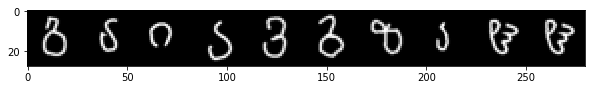

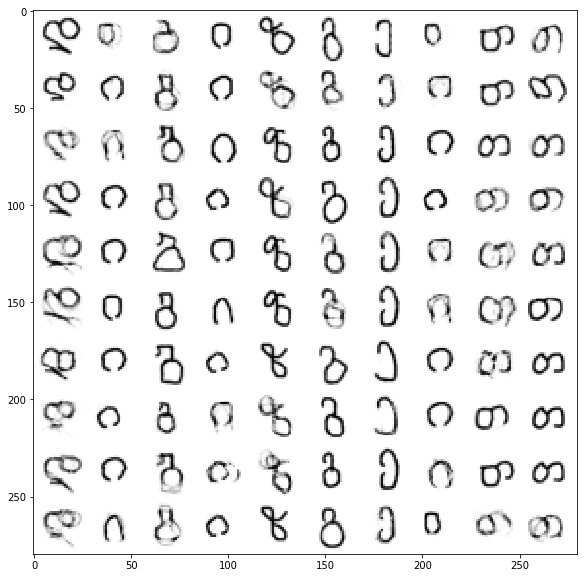

In [65]:

# Testing
# Generate images from noise, using the generator network.

noise_input1 = tf.placeholder(tf.float32, shape=[None, latent_dim])

decoder = tf.matmul(tf.concat([noise_input1,y1], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

n = 10
noise_dim=latent_dim
batch_x,batch_y = getbatchtest(n)

canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(1):
    # MNIST test set8
  
    #g=np.dot(batch_x, np.transpose(net.beta)) 
    #g=np.dot(net2input,net.beta)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        
for i in range(n):
    # Noise input.
    ztest = np.random.uniform(-1., 1., size=[n, noise_dim])
    
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 
    g = sess.run(decoder, feed_dict={noise_input1: ztest,y1:batch_y})
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    g = (g + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [6]:
# Training
for i in range(1, num_steps+1):
    
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, batch_y = getbatchtrain(batch_size1)

    feed_dict = {input_image: batch_x,y1:batch_y}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
    if i % 1000 == 0 or i == 1:
        print('Step %i, Loss: %f' % (i, l ))
        
noise_input1 = tf.placeholder(tf.float32, shape=[None, latent_dim])

decoder = tf.matmul(tf.concat([noise_input1,y1], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

noise_dim=latent_dim



        


Step 1, Loss: 616.440247
Step 1000, Loss: 135.216370
Step 2000, Loss: 114.170334
Step 3000, Loss: 100.873055
Step 4000, Loss: 90.051384
Step 5000, Loss: 87.083908
Step 6000, Loss: 82.930916
Step 7000, Loss: 77.439667
Step 8000, Loss: 72.793396
Step 9000, Loss: 78.878052
Step 10000, Loss: 75.400261
Step 11000, Loss: 77.731461
Step 12000, Loss: 72.679306
Step 13000, Loss: 75.834320
Step 14000, Loss: 75.322021
Step 15000, Loss: 81.855438
Step 16000, Loss: 72.854767
Step 17000, Loss: 73.154678
Step 18000, Loss: 76.994644
Step 19000, Loss: 77.455185
Step 20000, Loss: 76.478935
Step 21000, Loss: 73.356697
Step 22000, Loss: 74.115334
Step 23000, Loss: 73.468979
Step 24000, Loss: 70.904587
Step 25000, Loss: 73.705856
Step 26000, Loss: 74.005241
Step 27000, Loss: 82.511414
Step 28000, Loss: 73.151978
Step 29000, Loss: 77.745010
Step 30000, Loss: 74.695641
Step 31000, Loss: 75.015869
Step 32000, Loss: 76.844910
Step 33000, Loss: 75.696136
Step 34000, Loss: 73.225540
Step 35000, Loss: 75.507317
S

Step 248000, Loss: 72.660614
Step 249000, Loss: 73.893944
Step 250000, Loss: 73.459290
Step 251000, Loss: 76.891693
Step 252000, Loss: 77.652252
Step 253000, Loss: 72.539322
Step 254000, Loss: 71.834938
Step 255000, Loss: 78.993103
Step 256000, Loss: 83.037552
Step 257000, Loss: 71.724686
Step 258000, Loss: 77.843765
Step 259000, Loss: 72.745743
Step 260000, Loss: 78.116257
Step 261000, Loss: 77.844131
Step 262000, Loss: 74.374573
Step 263000, Loss: 72.808205
Step 264000, Loss: 72.364136
Step 265000, Loss: 74.944382
Step 266000, Loss: 74.614403
Step 267000, Loss: 71.493179
Step 268000, Loss: 75.971268
Step 269000, Loss: 74.483711
Step 270000, Loss: 75.814629
Step 271000, Loss: 71.904099
Step 272000, Loss: 73.610596
Step 273000, Loss: 70.431229
Step 274000, Loss: 71.006378
Step 275000, Loss: 73.384697
Step 276000, Loss: 74.417038
Step 277000, Loss: 69.646301
Step 278000, Loss: 71.635162
Step 279000, Loss: 73.683937
Step 280000, Loss: 70.274483
Step 281000, Loss: 74.809250
Step 282000, L

In [12]:
#begin=datetime.datetime.now()
for i in range(1, num_steps*10+1):
    # Prepare Data
    yset=sample_c(batch_size,y_dim22)
    ztest = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
    x_train2,y_train2=getbatchtrain(batch_size)
    
    g = sess.run(decoder, feed_dict={noise_input1: ztest,y1:y_train2 })
    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    g= np.reshape(g, newshape=[-1, 28, 28, 1])
    feed_dict = {input_imaget: x_train2,ct:g,y22:yset}
    _, l = sess.run([train_opt, loss_opt], feed_dict=feed_dict)
    
    if 1:
        #ztest = np.random.uniform(-1., 1., size=[64, noise_dim])
        yset=sample_c(batch_size,y_dim22)
        X_mb,y_mb,X_mb2,y_mb2=getbatchtrain2(batch_size)
        X_mb2= np.reshape(X_mb2, newshape=[-1, 28, 28, 1])
        feed_dict = {input_imaget: X_mb,ct:X_mb2,y22:yset}
        _, l = sess.run([train_opt, loss_opt], feed_dict=feed_dict)


    if i % 1000 == 0 or i == 1:
       
        print('Step %i, Loss: %f' % (i, l))

Step 1, Loss: 82.438980
Step 1000, Loss: 81.784332
Step 2000, Loss: 79.080276
Step 3000, Loss: 79.096680
Step 4000, Loss: 79.438782
Step 5000, Loss: 72.683739
Step 6000, Loss: 75.032700
Step 7000, Loss: 74.477020
Step 8000, Loss: 75.023819
Step 9000, Loss: 75.821693
Step 10000, Loss: 72.423409
Step 11000, Loss: 75.270187
Step 12000, Loss: 73.694557
Step 13000, Loss: 82.984451
Step 14000, Loss: 75.787704
Step 15000, Loss: 75.563721
Step 16000, Loss: 72.993103
Step 17000, Loss: 72.594849
Step 18000, Loss: 73.559586
Step 19000, Loss: nan
Step 20000, Loss: nan
Step 21000, Loss: nan
Step 22000, Loss: nan
Step 23000, Loss: nan
Step 24000, Loss: nan
Step 25000, Loss: nan
Step 26000, Loss: nan
Step 27000, Loss: nan
Step 28000, Loss: nan
Step 29000, Loss: nan
Step 30000, Loss: nan


KeyboardInterrupt: 

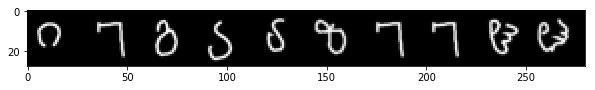

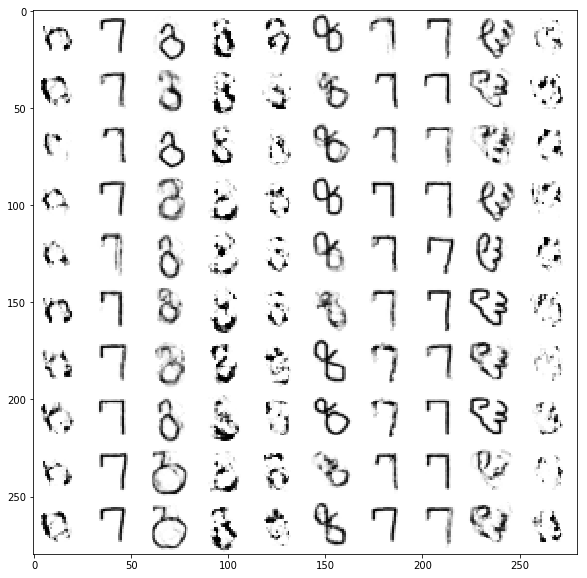

In [11]:

# Testing
# Generate images from noise, using the generator network.

noise_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
ctt = tf.placeholder(tf.float32, shape=[None, 784])
decodert = tf.matmul(ctt, weightst['decoder_h01']) + biasest['decoder_b01']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h02']) + biasest['decoder_b02']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h03']) + biasest['decoder_b03']
decodert = tf.nn.tanh(decodert)
decodert = tf.matmul(decodert, weightst['decoder_h04']) + biasest['decoder_b04']
decodert = tf.nn.tanh(decodert)

decodert = tf.matmul(tf.concat([noise_input,decodert,y22], 1) , weightst['decoder_h1']) + biasest['decoder_b1']
decodert = tf.nn.tanh(decodert)


decodert = tf.matmul(decodert, weightst['decoder_out']) + biasest['decoder_out']
decodert = tf.nn.sigmoid(decodert)

n = 10
noise_dim=latent_dim
#batch_x, _ =getbatchtrain(n)
batch_x, _ =getbatchtest(n)
yset=sample_c(n,y_dim22)
canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(1):
    # MNIST test set8
  
    #g=np.dot(batch_x, np.transpose(net.beta)) 
    #g=np.dot(net2input,net.beta)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        
for i in range(n):
    # Noise input.
    ztest = np.random.uniform(-1., 1., size=[n, noise_dim])
    yset=sample_c(n,y_dim22)
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 

    g = sess.run(decodert, feed_dict={noise_input: ztest,ctt:batch_x,y22:yset})
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    g = (g + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [77]:
#canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * (n+1), 28 * n))

g2 = (batch_x+ 1.) / 2.

g2 = -1 * (g2 - 1)
        
for i in range(n+1):
    # Noise input.
    ztest = np.random.uniform(-1., 1., size=[n, noise_dim])
    
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 
    g = sess.run(decodert, feed_dict={noise_input: ztest,ct:batch_x,y22:yset})
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    g = (g + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        if (i==0):
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g2[j].reshape([28, 28])
        else:    
            # Draw the generated digits
            canvas_recon[(i) * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        


plt.figure(figsize=(n+1, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")

plt.savefig('/home/pt/GANvae-min-om-pic-2-2-train14.png' )

In [78]:
ckpt_file=os.path.join("/home/pt/test1/omnist2/model/om-min-2-2-2CVAE","drawmodel.ckpt")
print("Model saved in file: %s" % saver.save(sess,ckpt_file))
sess.close()

Model saved in file: /home/pt/test1/omnist2/model/om-min-2-2-2CVAE/drawmodel.ckpt


In [ ]:
    if i  == 30000 :
        k=2000
        Lxs=[0]*(k+1)
        for j in range(k):
            X_mb,y_mb,X_mb2,y_mb2=getbatchtest2(batch_size)
          
            feed_dict = {input_imaget: X_mb,ct:X_mb2,y22:yset}
            Lxs[j] = sess.run([loss_opt], feed_dict=feed_dict)
        sum=0
        sum2=0
        for j in range(k):
            sum+=Lxs[j][0]
            sum2+=Lxs10[30000-j-1]
        kk=sum/2000
        kk2=sum2/2000
        print ("3w-10")
        print (kk,kk2)
        end=datetime.datetime.now()
        print ((end-begin))
        
    if i  == 80000 :
        k=2000
        Lxs=[0]*(k+1)
        for j in range(k):
            X_mb,y_mb,X_mb2,y_mb2=getbatchtest2(batch_size)
          
            feed_dict = {input_imaget: X_mb,ct:X_mb2,y22:yset}
            Lxs[j] = sess.run([loss_opt], feed_dict=feed_dict)
        sum=0
        sum2=0
        for j in range(k):
            sum+=Lxs[j][0]
            sum2+=Lxs10[80000-j-1]
        kk=sum/2000
        kk2=sum2/2000
        print ("8w")
        print (kk,kk2)
        end=datetime.datetime.now()
        print ((end-begin))        
    if i  == 160000 -2:
        k=2000
        Lxs=[0]*(k+1)
        for j in range(k):
            X_mb,y_mb,X_mb2,y_mb2=getbatchtest2(batch_size)
          
            feed_dict = {input_imaget: X_mb,ct:X_mb2,y22:yset}
            Lxs[j] = sess.run([loss_opt], feed_dict=feed_dict)           
        sum=0
        sum2=0
        for j in range(k):
            sum+=Lxs[j][0]
            sum2+=Lxs10[160000-j-2]
        kk=sum/2000
        kk2=sum2/2000
        print ("16w")
        print (kk,kk2)
        end=datetime.datetime.now()
        print ((end-begin)) 